In [1]:
from sklearn.cluster import KMeans

KMeans(n_clusters=8,
       init='k-means++',
       n_init=10,
       max_iter=300,
       tol=0.0001,
       precompute_distances='auto',
       verbose=0,
       random_state=None,
       copy_x=True,
       n_jobs=None,
       algorithm='auto')

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [2]:
# 导入包
import numpy as np
import sklearn
from sklearn.datasets import make_blobs  # 导入产生模拟数据的方法
from sklearn.cluster import KMeans  # 导入kmeans类

In [3]:
# 1. 产生模拟数据；random_state此参数让结果容易复现，随机过程跟系统时间有关
N = 100
centers = 4

X, Y = make_blobs(n_samples=N, n_features=2, centers=centers, random_state=28)
print(Y)

[0 1 3 1 2 0 3 0 0 3 0 2 1 1 3 1 0 2 0 1 0 1 3 1 3 0 1 3 1 1 0 0 1 3 1 0 3
 2 3 1 3 3 0 2 2 0 2 3 0 1 3 3 3 3 2 2 0 0 2 2 2 3 1 2 0 3 3 1 2 0 3 0 1 0
 2 2 3 1 1 1 0 3 3 2 3 2 1 0 2 2 2 1 2 1 2 2 0 2 1 0]


In [4]:
# 2. 模型构建;init初始化函数的意思
km = KMeans(n_clusters=centers, init='random', random_state=28)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=28,
       tol=0.0001, verbose=0)

In [5]:
# 实际的y值
Y

array([0, 1, 3, 1, 2, 0, 3, 0, 0, 3, 0, 2, 1, 1, 3, 1, 0, 2, 0, 1, 0, 1,
       3, 1, 3, 0, 1, 3, 1, 1, 0, 0, 1, 3, 1, 0, 3, 2, 3, 1, 3, 3, 0, 2,
       2, 0, 2, 3, 0, 1, 3, 3, 3, 3, 2, 2, 0, 0, 2, 2, 2, 3, 1, 2, 0, 3,
       3, 1, 2, 0, 3, 0, 1, 0, 2, 2, 3, 1, 1, 1, 0, 3, 3, 2, 3, 2, 1, 0,
       2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 0])

In [6]:
# 模型的预测
y_hat = km.predict(X[:10])
y_hat

array([0, 2, 1, 2, 3, 0, 1, 0, 0, 1])

In [7]:
print("所有样本距离所属簇中心点的总距离和为:%.5f" % km.inertia_)
print("所有样本距离所属簇中心点的平均距离为:%.5f" % (km.inertia_ / N))

所有样本距离所属簇中心点的总距离和为:184.64263
所有样本距离所属簇中心点的平均距离为:1.84643


In [8]:
print("所有的中心点聚类中心坐标:")
cluter_centers = km.cluster_centers_
print(cluter_centers)  # 4组

所有的中心点聚类中心坐标:
[[ 4.63158330e+00  1.81989519e+00]
 [-6.61167883e+00  6.91472919e+00]
 [-7.38206071e+00 -2.32141230e+00]
 [ 5.54777181e+00 -6.72218901e-03]]


In [8]:
print("score其实就是所有样本点离所属簇中心点距离和的相反数:")
print(km.score(X))

score其实就是所有样本点离所属簇中心点距离和的相反数:
-184.64263227954362


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # 忽视

In [ ]:
def expand(a, b):
    d = (b - a) * 0.1
    return a - d, b + d

In [9]:
if __name__ == "__main__":
    N = 400
    centers = 4
    data, y = ds.make_blobs(N, n_features=2, centers=centers, random_state=2)
    data2, y2 = ds.make_blobs(N,
                              n_features=2,
                              centers=centers,
                              cluster_std=(1, 2.5, 0.5, 2),
                              random_state=2)
    data3 = np.vstack((data[y == 0][:], data[y == 1][:50], data[y == 2][:20],
                       data[y == 3][:5]))
    y3 = np.array([0] * 100 + [1] * 50 + [2] * 20 + [3] * 5)

    cls = KMeans(n_clusters=4, init='k-means++')
    y_hat = cls.fit_predict(data)
    y2_hat = cls.fit_predict(data2)
    y3_hat = cls.fit_predict(data3)

    m = np.array(((1, 1), (1, 3)))
    data_r = data.dot(m)
    y_r_hat = cls.fit_predict(data_r)

    # 设置字符集，防止中文乱码
    # mpl.rcParams["font.sans-serif"] = [u'simHei'] #Win自带的字体
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  #Mac自带的字体
    mpl.rcParams["axes.unicode_minus"] = False
    cm = matplotlib.colors.ListedColormap(list('rgbm'))

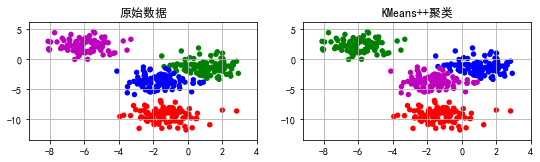

In [10]:
plt.figure(figsize=(9, 10), facecolor='w')
plt.subplot(421)
plt.title(u'原始数据')
plt.scatter(data[:, 0], data[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data, axis=0)
x1_max, x2_max = np.max(data, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(422)
plt.title(u'KMeans++聚类')
plt.scatter(data[:, 0], data[:, 1], c=y_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

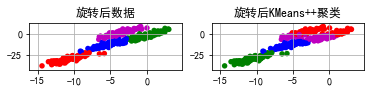

In [11]:
plt.subplot(423)
plt.title(u'旋转后数据')
plt.scatter(data_r[:, 0], data_r[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data_r, axis=0)
x1_max, x2_max = np.max(data_r, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(424)
plt.title(u'旋转后KMeans++聚类')
plt.scatter(data_r[:, 0], data_r[:, 1], c=y_r_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

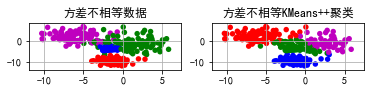

In [12]:
plt.subplot(425)
plt.title(u'方差不相等数据')
plt.scatter(data2[:, 0], data2[:, 1], c=y2, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data2, axis=0)
x1_max, x2_max = np.max(data2, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(426)
plt.title(u'方差不相等KMeans++聚类')
plt.scatter(data2[:, 0], data2[:, 1], c=y2_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

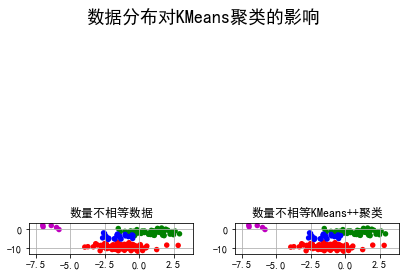

In [13]:
plt.subplot(427)
plt.title(u'数量不相等数据')
plt.scatter(data3[:, 0], data3[:, 1], s=30, c=y3, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data3, axis=0)
x1_max, x2_max = np.max(data3, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(428)
plt.title(u'数量不相等KMeans++聚类')
plt.scatter(data3[:, 0], data3[:, 1], c=y3_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.tight_layout(2)
plt.suptitle(u'数据分布对KMeans聚类的影响', fontsize=18)
plt.subplots_adjust(top=0.92)
plt.show()

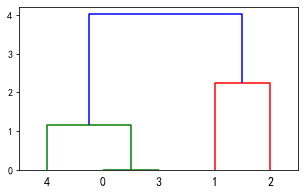

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt
X = [[1, 2], [3, 2], [4, 4], [1, 2], [1, 3]]
Z = linkage(X, 'ward')
f = fcluster(Z, 4, 'distance')
fig = plt.figure(figsize=(5, 3))
dn = dendrogram(Z)
plt.show()

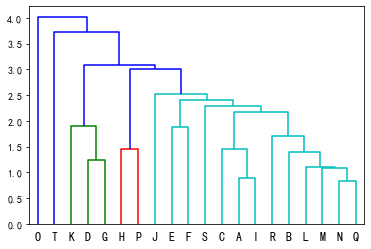

In [15]:
# cluster.py
# 导入相应的包
import scipy
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import vq, kmeans, whiten
import numpy as np
import matplotlib.pylab as plt

# 生成待聚类的数据点,这里生成了20个点,每个点4维:
points = scipy.random.randn(20, 4)
# 加一个标签进行区分
A = []
for i in range(20):
    a = chr(i + ord('A'))
    A.append(a)
# 1. 层次聚类
# 生成点与点之间的距离矩阵,这里用的欧氏距离:
disMat = sch.distance.pdist(points, 'euclidean')
# 进行层次聚类:
Z = sch.linkage(disMat, method='average')
# 将层级聚类结果以树状图表示出来并保存为plot_dendrogram.png
P = sch.dendrogram(Z, labels=A)